In [1]:
!pip install tensorflow==1.14.0  
import tensorflow as tf
print(tf.__version__)

C:\Users\Usuario\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Usuario\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Usuario\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Usuario\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

1.14.0


## Se entrenará una red multicapas para resolver la lógica

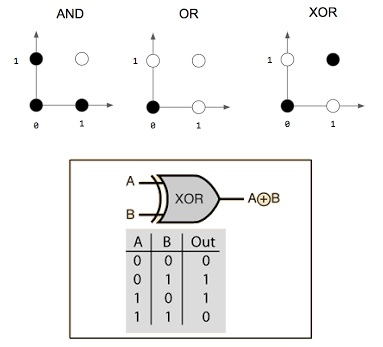

In [2]:
import numpy as np
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.float32)  # 4x2, input
y = np.array([[0], [1], [1], [0]], np.float32)                      # 4, correct output, AND operation
y = np.reshape(y, [4,1])

## Para resolver esta lógica se requiere una red neuronal con una capa oculta (Red Neuronal Profunda)

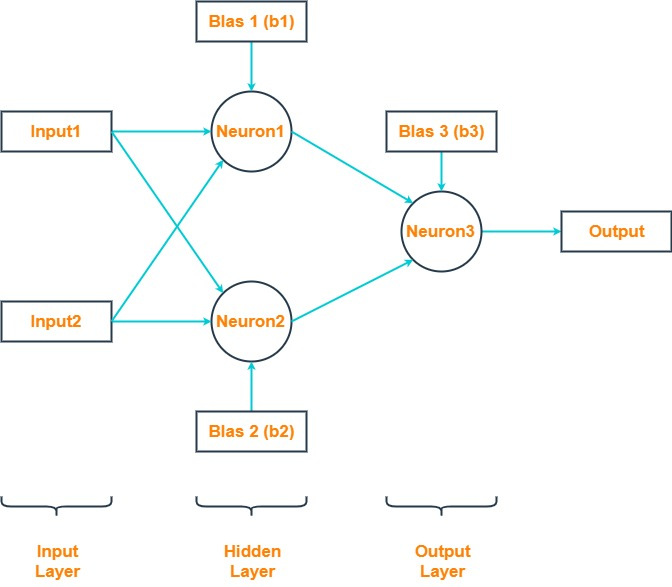

In [3]:
num_features = 2
num_iter = 20000
display_step = int(num_iter / 20)
learning_rate = 0.01

num_input = 2          # units in the input layer
num_hidden1 = 2        # units in the first hidden layer
num_output = 1         # units in the output, only one output 0 or 1

Se define la funcion percelptron multicapas (MLP), los placeholders e inicializamos los valores de pesos aleatoriamente

In [4]:
#%% mlp function

def multi_layer_perceptron_xor(x, weights, biases):

    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.sigmoid(hidden_layer1)

    out_layer = tf.add(tf.matmul(hidden_layer1, weights['w_out']), biases['b_out'])
    
    return out_layer

# trainum_inputg data and labels
X = tf.placeholder('float', [None, num_input])     # training data
Y = tf.placeholder('float', [None, num_output])    # labels


# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])), # w1, from input layer to hidden layer 1
    'w_out': tf.Variable(tf.random_normal([num_hidden1, num_output])) # w2, from hidden layer 1 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.zeros([num_hidden1])),
    'b_out': tf.Variable(tf.zeros([num_output]))
}

model = multi_layer_perceptron_xor(X, weights, biases)

Se define la funcion de costo que se va a usar, que basicamente es la expresion matematica que compara la salida de la red neuronal y el valor esperado

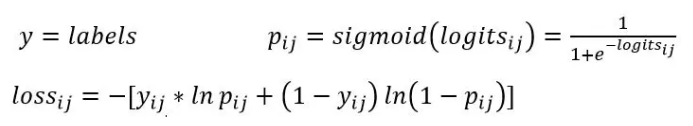

In [5]:

'''
- cost function and optimization
- sigmoid cross entropy -- single output
- softmax cross entropy -- multiple output, normalized
'''

# = - x * z + log(1 + exp(x))   donde   logits=x  y labels = y 

loss_func = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))
#loss_func = tf.reduce_mean(tf.squared_difference(Y,model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_func)
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_func)


#correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_summary = tf.summary.scalar("cost",loss_func)
# Merge all summaries
all_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("C:/Users/Usuario/Desktop/Clase_Redes_Neuronales_USON-main", sess.graph)

epoch  0
loss= 2.81218
w[0,0] -0.078054644 W[1,0] 0.18095066
W[0,1] -1.0526865 W[1,1] -0.62211925
b[0] -0.00056711613 b[1] 0.00010704357


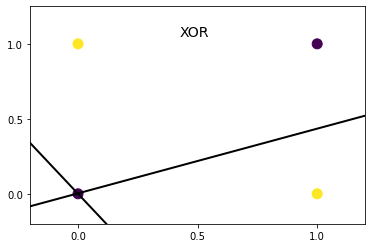

epoch  1000
loss= 2.75243
w[0,0] -0.12866499 W[1,0] 0.12872024
W[0,1] -1.182717 W[1,1] -0.82460743
b[0] -0.03728329 b[1] -0.07592645


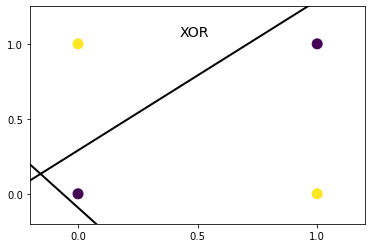

epoch  2000
loss= 2.70993
w[0,0] -0.18793255 W[1,0] 0.0738905
W[0,1] -1.4639896 W[1,1] -1.2104093
b[0] -0.03535408 b[1] -0.18122514


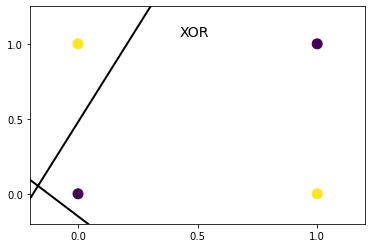

epoch  3000
loss= 2.60181
w[0,0] -0.2917108 W[1,0] -0.021709707
W[0,1] -1.9509791 W[1,1] -1.7980096
b[0] -0.024705973 b[1] -0.15248467


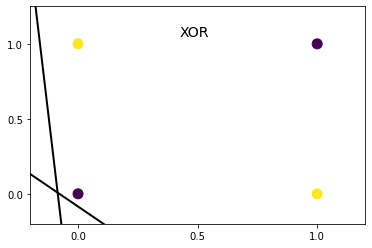

epoch  4000
loss= 2.41142
w[0,0] -0.4688112 W[1,0] -0.185477
W[0,1] -2.6088734 W[1,1] -2.5185056
b[0] 0.02351478 b[1] 0.117532015


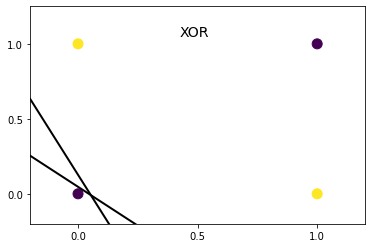

epoch  5000
loss= 2.18951
w[0,0] -0.7325792 W[1,0] -0.4318264
W[0,1] -3.311806 W[1,1] -3.2452328
b[0] 0.19061838 b[1] 0.44705972


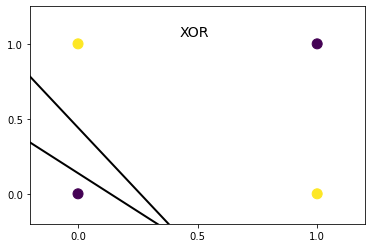

epoch  6000
loss= 1.96343
w[0,0] -1.0406648 W[1,0] -0.7543825
W[0,1] -3.935781 W[1,1] -3.8681529
b[0] 0.62936205 b[1] 0.73049664


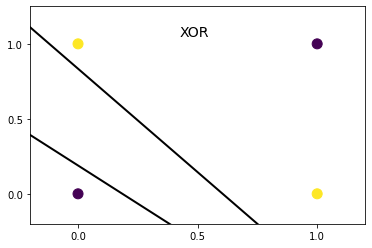

epoch  7000
loss= 1.65177
w[0,0] -1.4098182 W[1,0] -1.2457824
W[0,1] -4.4530516 W[1,1] -4.379361
b[0] 1.452272 b[1] 1.0153204


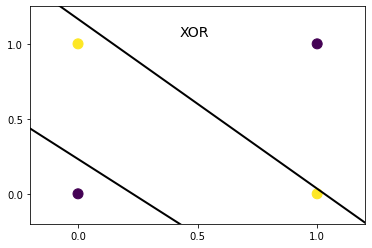

epoch  8000
loss= 1.20855
w[0,0] -1.9506148 W[1,0] -1.9077125
W[0,1] -4.866013 W[1,1] -4.801644
b[0] 2.530776 b[1] 1.3174118


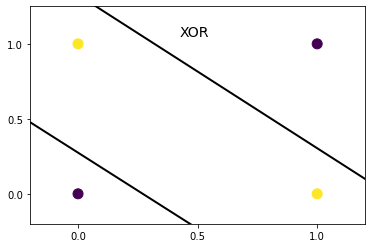

epoch  9000
loss= 0.80034
w[0,0] -2.5392764 W[1,0] -2.527914
W[0,1] -5.179729 W[1,1] -5.129928
b[0] 3.5341332 b[1] 1.5887028


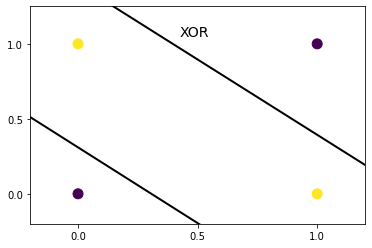

epoch  10000
loss= 0.53959
w[0,0] -3.007231 W[1,0] -3.0012546
W[0,1] -5.4124784 W[1,1] -5.3728228
b[0] 4.294572 b[1] 1.7998668


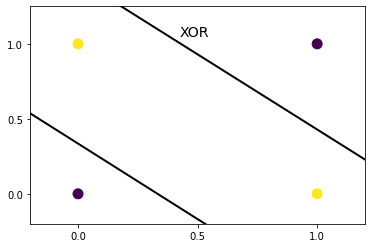

epoch  11000
loss= 0.38793
w[0,0] -3.3515174 W[1,0] -3.3469617
W[0,1] -5.5886717 W[1,1] -5.555527
b[0] 4.846715 b[1] 1.9574925


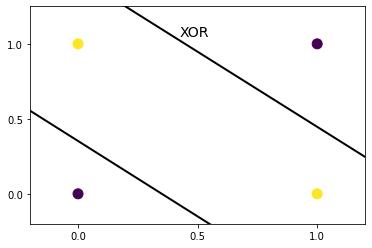

epoch  12000
loss= 0.29607
w[0,0] -3.6100361 W[1,0] -3.6061187
W[0,1] -5.727087 W[1,1] -5.698348
b[0] 5.2587476 b[1] 2.0769682


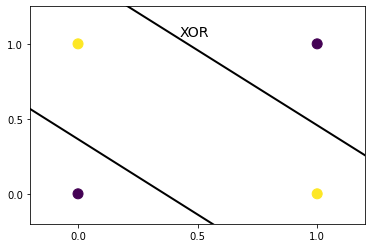

epoch  13000
loss= 0.23660
w[0,0] -3.811623 W[1,0] -3.8080964
W[0,1] -5.839662 W[1,1] -5.8140903
b[0] 5.5786095 b[1] 2.170397


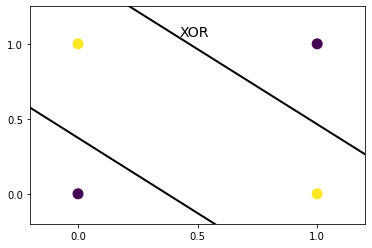

epoch  14000
loss= 0.19572
w[0,0] -3.9743447 W[1,0] -3.9710994
W[0,1] -5.933841 W[1,1] -5.910659
b[0] 5.835845 b[1] 2.2457514


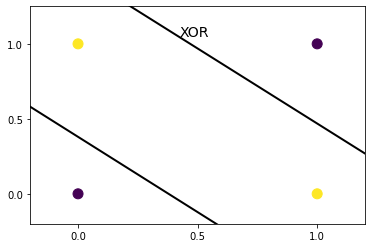

epoch  15000
loss= 0.16620
w[0,0] -4.109462 W[1,0] -4.106432
W[0,1] -6.014414 W[1,1] -5.9931035
b[0] 6.0487494 b[1] 2.308169


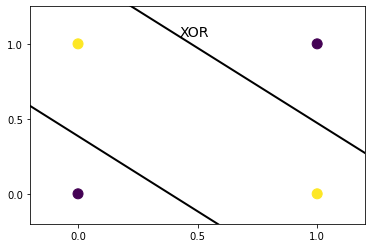

epoch  16000
loss= 0.14403
w[0,0] -4.2242303 W[1,0] -4.2213755
W[0,1] -6.0845847 W[1,1] -6.064785
b[0] 6.2290735 b[1] 2.3610218


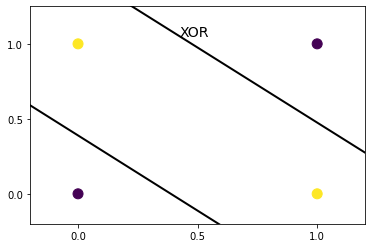

epoch  17000
loss= 0.12683
w[0,0] -4.3235106 W[1,0] -4.3207984
W[0,1] -6.146588 W[1,1] -6.128033
b[0] 6.3846664 b[1] 2.4065955


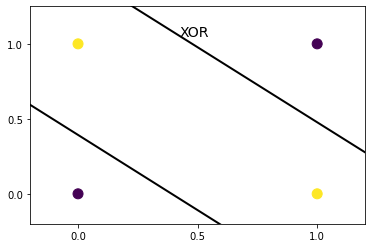

epoch  18000
loss= 0.11315
w[0,0] -4.410675 W[1,0] -4.4080915
W[0,1] -6.2020216 W[1,1] -6.184519
b[0] 6.5209656 b[1] 2.4464843


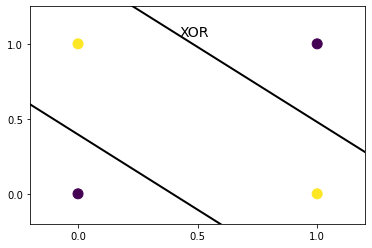

epoch  19000
loss= 0.10203
w[0,0] -4.488156 W[1,0] -4.4856787
W[0,1] -6.2520747 W[1,1] -6.2354703
b[0] 6.6418705 b[1] 2.481837


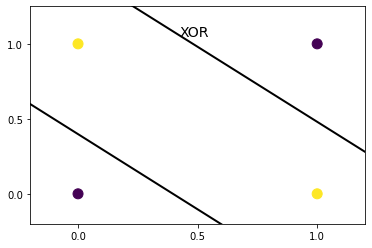

In [7]:
from matplotlib import pyplot as plt

for k in range(num_iter):
    tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={X: x, Y: y})
    if k % display_step == 0:
        #print('output: ', sess.run(model, feed_dict={X:x}))
        print('epoch ',k)
        print('loss= ' + "{:.5f}".format(tmp_cost))
        # Generate accuracy stats on test data 
        summary_results = sess.run(all_summary,feed_dict={X: x, Y: y})
        writer.add_summary(summary_results,k)
        
        
        
        # De aqui para abajo es para graficar 
        # separates the input space  
        W = np.squeeze(sess.run(weights['w_h1']))   # 2x2
        b = np.squeeze(sess.run(biases['b_h1']))    # 2,
        #%%
        print('w[0,0]',W[0,0],'W[1,0]',W[1,0])
        print('W[0,1]',W[0,1],'W[1,1]',W[1,1])
        print('b[0]',b[0],'b[1]',b[1])
        # Now plot the fitted line. We need only two points to plot the line
        plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
        plot_y =  -1 / W[1, 0] * (W[0, 0] * plot_x + b[0])
        plot_y = np.reshape(plot_y, [2, -1])
        plot_y = np.squeeze(plot_y)

        plot_y2 = -1 / W[1, 1] * (W[0, 1] * plot_x + b[1])
        plot_y2 = np.reshape(plot_y2, [2, -1])
        plot_y2 = np.squeeze(plot_y2)

        ytemp = np.array([0, 1, 1, 0], np.float32)  
        #plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
        plt.scatter(x[:, 0], x[:, 1], c=ytemp, s=100, cmap='viridis')
        plt.plot(plot_x, plot_y, color='k', linewidth=2)    # line 1
        plt.plot(plot_x, plot_y2, color='k', linewidth=2)   # line 2
        plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
        plt.text(0.425, 1.05, 'XOR', fontsize=14)
        plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
        plt.show()

#%%

sess.close()